In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.stats import weightstats as s_tests
import scipy.stats as statyst

from statsmodels.graphics.gofplots import qqplot


In [8]:
df = pd.read_csv('D:\work\\6_semak\KSAD\lab3\HARDataset\\train\Inertial Signals\\total_acc_x_train.txt', delim_whitespace=True)
df.head()

,1.0128170e+000,1.0228330e+000,1.0220280e+000,1.0178770e+000,1.0236800e+000,1.0169740e+000,1.0177460e+000,1.0192630e+000,1.0164170e+000,1.0207450e+000,...,1.0209810e+000,1.0180650e+000,1.0196380e+000,1.0200170e+000,1.0187660e+000,1.0198150e+000,1.0192900e+000,1.0184450e+000,1.0193720e+000,1.0211710e+000
0,1.018851,1.022380,1.020781,1.020218,1.021344,1.020522,1.019790,1.019216,1.018307,1.017996,...,1.019291,1.019258,1.020736,1.020950,1.020491,1.018685,1.015660,1.014788,1.016499,1.017849
1,1.023127,1.021882,1.019178,1.015861,1.012893,1.016451,1.020331,1.020266,1.021759,1.018649,...,1.020304,1.021516,1.019417,1.019312,1.019448,1.019434,1.019916,1.021041,1.022935,1.022019
2,1.017682,1.018149,1.019854,1.019880,1.019121,1.020479,1.020595,1.016340,1.010611,1.009013,...,1.021295,1.022934,1.022183,1.021637,1.020598,1.018887,1.019161,1.019916,1.019602,1.020735
3,1.019952,1.019616,1.020933,1.023061,1.022242,1.020867,1.021939,1.022300,1.022302,1.022254,...,1.022687,1.023670,1.019899,1.017381,1.020389,1.023884,1.021753,1.019425,1.018896,1.016787
4,1.021278,1.018878,1.019219,1.021986,1.022246,1.021240,1.019609,1.018947,1.019762,1.019384,...,1.018125,1.016268,1.014853,1.016995,1.019053,1.018119,1.018539,1.020341,1.020415,1.021908


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   couple_1_1  50 non-null     float64
 1   couple_1_2  50 non-null     float64
 2   couple_2_1  50 non-null     float64
 3   couple_2_2  50 non-null     float64
 4   couple_3_1  50 non-null     float64
 5   couple_3_2  50 non-null     float64
 6   couple_4_1  50 non-null     float64
 7   couple_4_2  50 non-null     float64
 8   couple_5_1  50 non-null     float64
 9   couple_5_2  50 non-null     float64
 10  couple_6_1  50 non-null     float64
 11  couple_6_2  50 non-null     float64
dtypes: float64(12)
memory usage: 4.8 KB


In [4]:
df.isnull().any()

couple_1_1    False
couple_1_2    False
couple_2_1    False
couple_2_2    False
couple_3_1    False
couple_3_2    False
couple_4_1    False
couple_4_2    False
couple_5_1    False
couple_5_2    False
couple_6_1    False
couple_6_2    False
dtype: bool

In [5]:
pair1 = df[['couple_1_1', 'couple_1_2']]
pair2 = df[['couple_2_1', 'couple_2_2']]
pair3 = df[['couple_3_1', 'couple_3_2']]
pair4 = df[['couple_4_1', 'couple_4_2']]
pair5 = df[['couple_5_1', 'couple_5_2']]
pair6 = df[['couple_6_1', 'couple_6_2']]

In [6]:
def show_hist_graph(arr, title='Hist', x_label='Value', y_label='Amount'):
  sns.displot(arr, kde=True, height=4, aspect=3)  
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()

def show_qq_plot(arr, title='QQPlot'):
  qqplot(arr, line='s')
  plt.show()

In [7]:
def check_normal_distribution(array):
  show_hist_graph(array)
  show_qq_plot(array)
  alpha = 0.05
  stat, p = statyst.shapiro(array)
  if p > alpha:
    print('Looks to be Gaussian. Failed to reject H0')
  else:
    print('Looks not to be Gaussian. Reject H0')

# 1 пара

### Для проверки гипотезы сперва необходимо установить нормальность распределений двух выборок

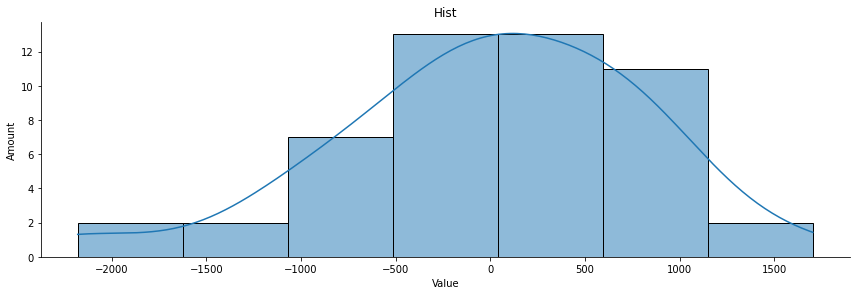

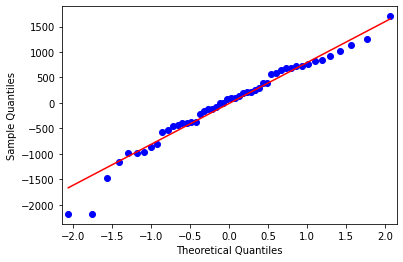

Looks to be Gaussian. Failed to reject H0


In [8]:
check_normal_distribution(pair1['couple_1_1'])

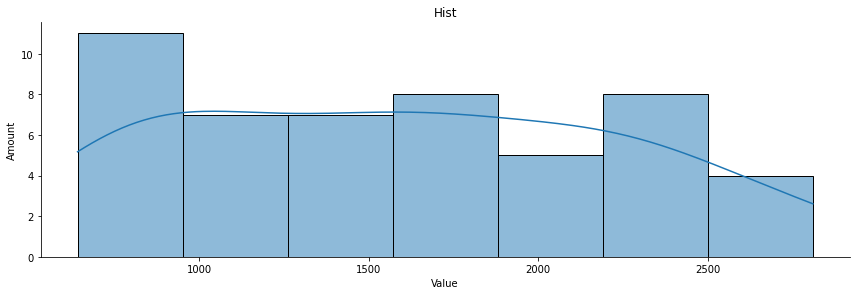

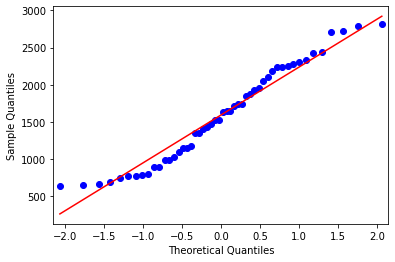

Looks not to be Gaussian. Reject H0


In [9]:
check_normal_distribution(pair1['couple_1_2'])

Матожидания:

-8.032348603681857 1593.5448659997458


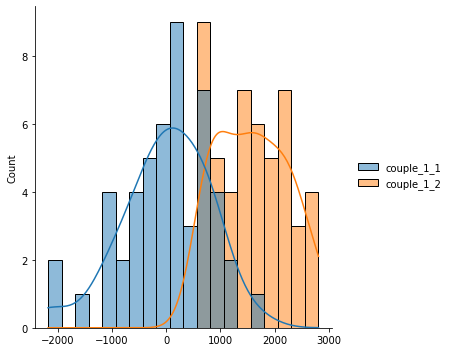

In [10]:
sns.displot((pair1.couple_1_1, pair1.couple_1_2), kde=True, bins = 20)

m1 = pair1.couple_1_1.mean()
m2 = pair1.couple_1_2.mean()

print("Матожидания:")
print()
print(m1, m2)

### Так как одна из выборок имеет распределение приближенное к нормальному, а вторая-нет, применяем критерий Манна-Уитни для проверки гипотезы

In [11]:
stats, p = statyst.mannwhitneyu(pair1.couple_1_1, pair1.couple_1_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 4.053755711795249e-15
Гипотеза отвергнута


### Также проверим гипотезу о равенстве дисперсий

In [12]:
stats, p = statyst.bartlett(pair1.couple_1_1, pair1.couple_1_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.12346484775889294
Гипотеза принята


# 2 пара

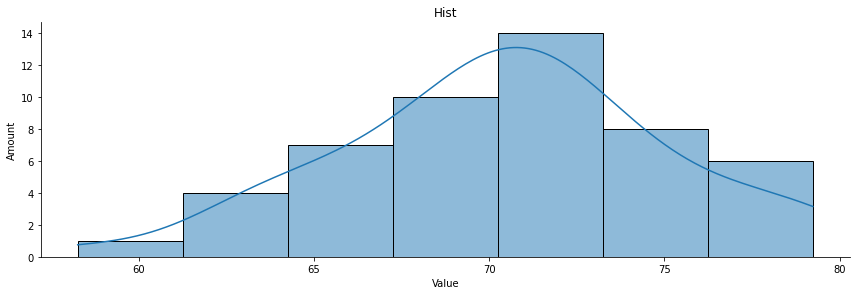

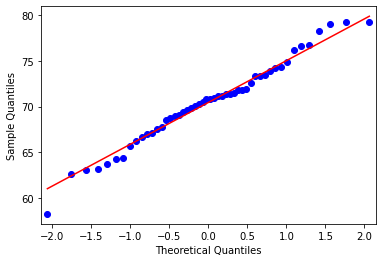

Looks to be Gaussian. Failed to reject H0


In [13]:
check_normal_distribution(pair2['couple_2_1'])

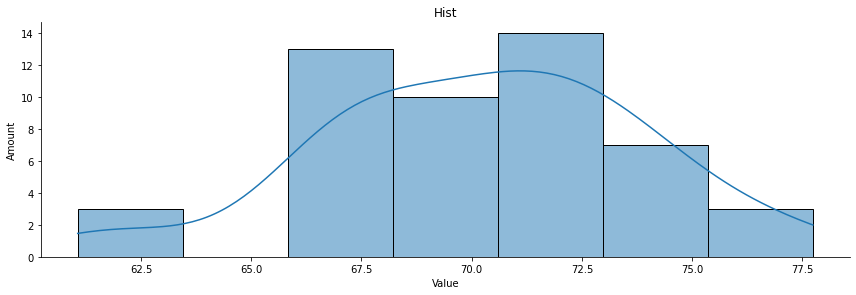

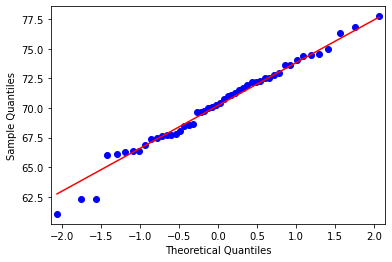

Looks to be Gaussian. Failed to reject H0


In [14]:
check_normal_distribution(pair2['couple_2_2'])

Матожидания:

70.44405739353213 70.20625551238778


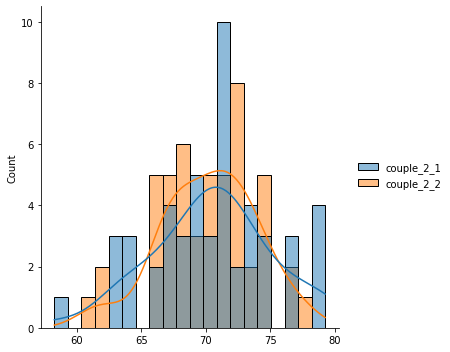

In [15]:
sns.displot((pair2.couple_2_1, pair2.couple_2_2), kde=True, bins = 20)

m1 = pair2.couple_2_1.mean()
m2 = pair2.couple_2_2.mean()

print("Матожидания:")
print()
print(m1, m2)

### Так как выборки имеют приблизительно нормальное распределение, то воспользуемся критерием Стьюдента

In [16]:
stat, p = statyst.ttest_ind(pair2.couple_2_1, pair2.couple_2_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.775728759229252
Гипотеза принята


### Проверим гипотезу о равенстве дисперсий

In [17]:
stats, p = statyst.bartlett(pair1.couple_1_1, pair1.couple_1_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.12346484775889294
Гипотеза принята


# Пара 3

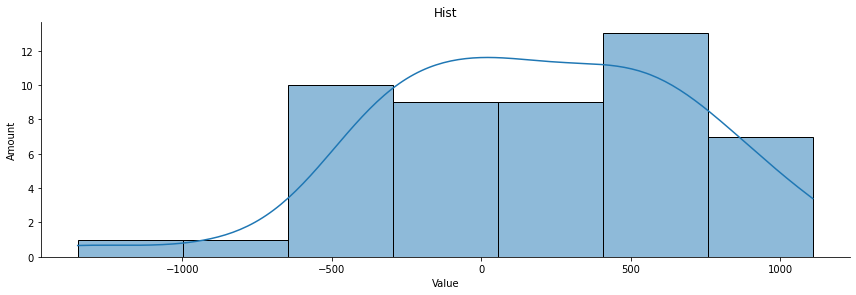

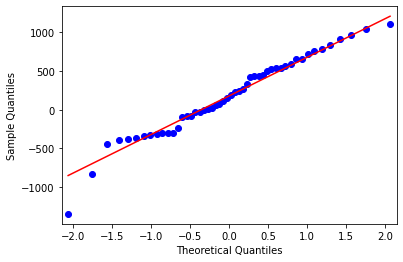

Looks to be Gaussian. Failed to reject H0


In [18]:
check_normal_distribution(pair3['couple_3_1'])

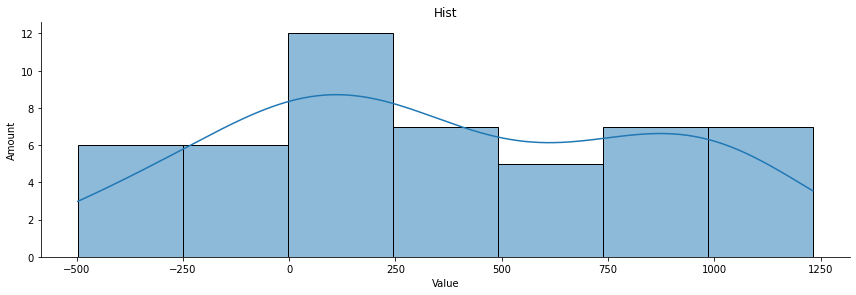

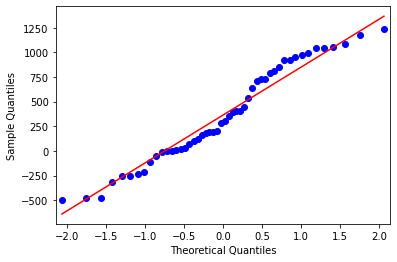

Looks not to be Gaussian. Reject H0


In [19]:
check_normal_distribution(pair3['couple_3_2'])

Матожидания:

178.55627317612306 363.18811891836907


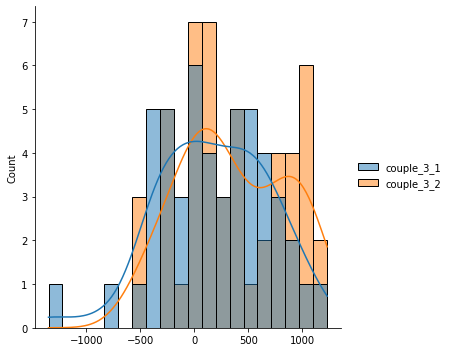

In [20]:
sns.displot((pair3.couple_3_1, pair3.couple_3_2), kde=True, bins = 20)

m1 = pair3.couple_3_1.mean()
m2 = pair3.couple_3_2.mean()

print("Матожидания:")
print()
print(m1, m2)

### Так как одна из выборок имеет распределение приближенное к нормальному, а вторая-нет, применяем критерий Манна-Уитни для проверки гипотезы

In [21]:
stats, p = statyst.mannwhitneyu(pair3.couple_3_1, pair3.couple_3_2)
print("p = " + str(p))
alpha = 0.1
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.050785757073788386
Гипотеза отвергнута


### Также проверим гипотезу о равенстве дисперсий

In [22]:
stats, p = statyst.bartlett(pair3.couple_3_1, pair3.couple_3_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.8440595726508566
Гипотеза принята


# Пара 4

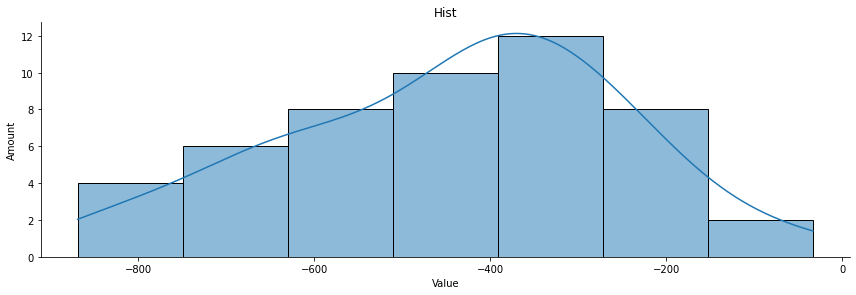

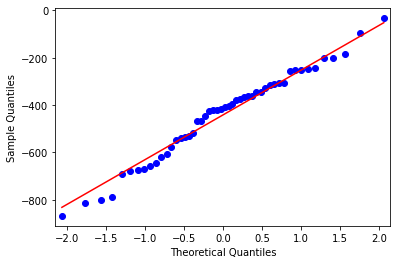

Looks to be Gaussian. Failed to reject H0


In [23]:
check_normal_distribution(pair4['couple_4_1'])

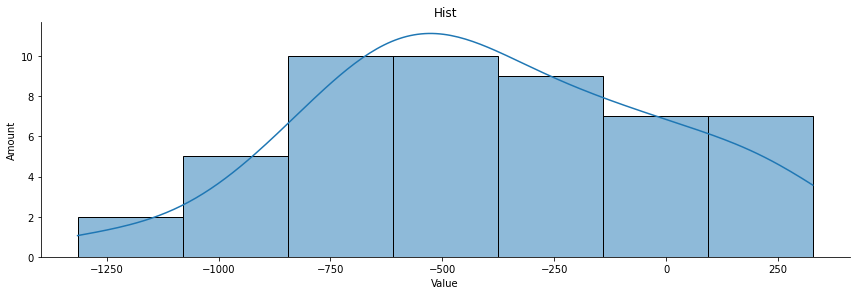

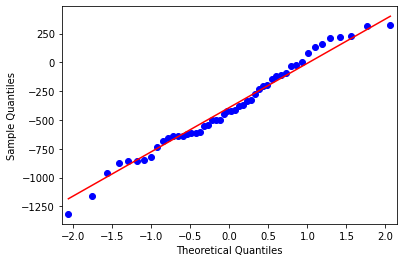

Looks to be Gaussian. Failed to reject H0


In [24]:
check_normal_distribution(pair4['couple_4_2'])

Матожидания:

-442.3328692714963 -391.46689527219394


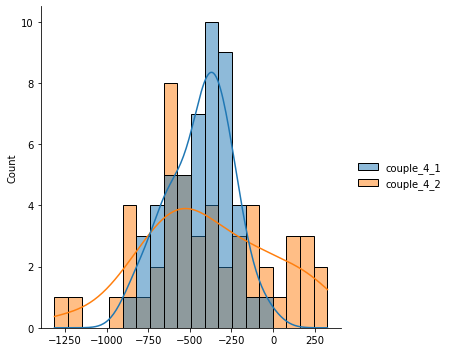

In [25]:
sns.displot((pair4.couple_4_1, pair4.couple_4_2), kde=True, bins = 20)

m1 = pair4.couple_4_1.mean()
m2 = pair4.couple_4_2.mean()

print("Матожидания:")
print()
print(m1, m2)

### Так как выборки имеют приблизительно нормальное распределение, то воспользуемся критерием Стьюдента

In [26]:
stat, p = statyst.ttest_ind(pair4.couple_4_1, pair4.couple_4_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.4075642652830007
Гипотеза принята


In [27]:
stats, p = statyst.bartlett(pair4.couple_4_1, pair4.couple_4_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 2.078528897371002e-06
Гипотеза отвергнута


# Пара 5

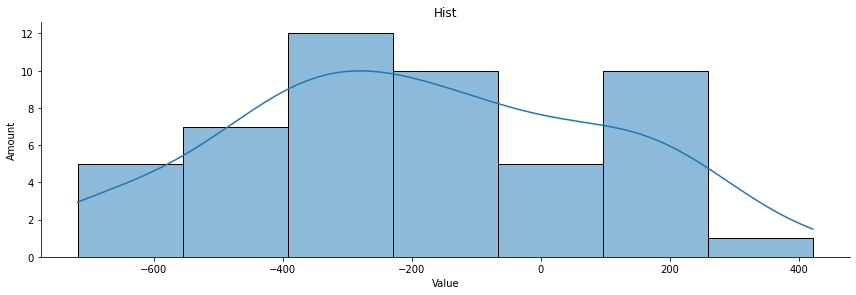

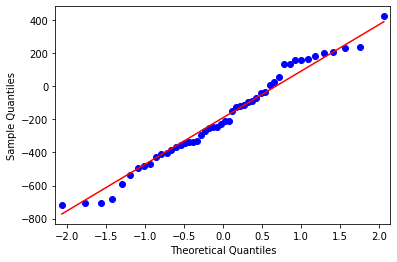

Looks to be Gaussian. Failed to reject H0


In [28]:
check_normal_distribution(pair5['couple_5_1'])

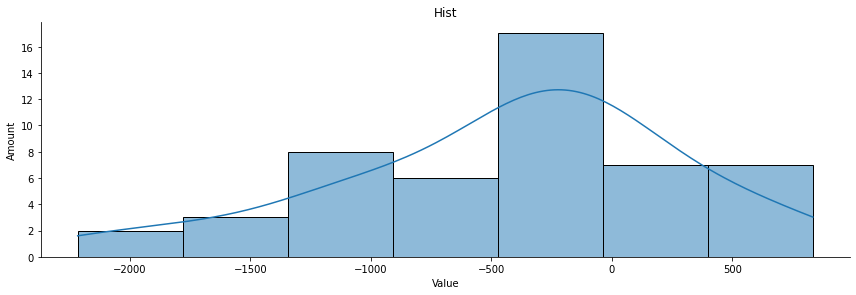

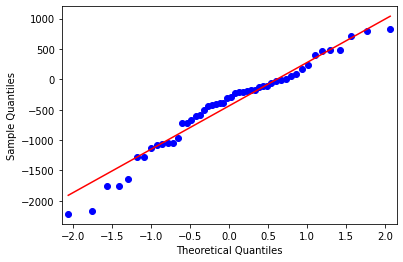

Looks to be Gaussian. Failed to reject H0


In [29]:
check_normal_distribution(pair5['couple_5_2'])

Матожидания:

-191.19896120381313 -435.30731477587426


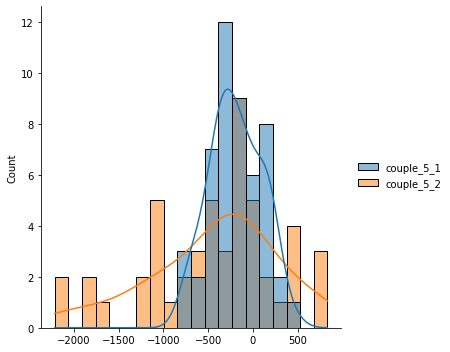

In [30]:
sns.displot((pair5.couple_5_1, pair5.couple_5_2), kde=True, bins = 20)

m1 = pair5.couple_5_1.mean()
m2 = pair5.couple_5_2.mean()

print("Матожидания:")
print()
print(m1, m2)

### Попробуем применить z-критерий

In [31]:
stat, p = s_tests.ztest(pair5.couple_5_1, pair5.couple_5_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.02618530237325828
Гипотеза отвергнута


### Так как выборки имеют приблизительно нормальное распределение, то воспользуемся критерием Стьюдента

In [32]:
stat, p = statyst.ttest_ind(pair5.couple_5_1, pair5.couple_5_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.028482181941204655
Гипотеза отвергнута


In [33]:
stats, p = statyst.bartlett(pair5.couple_5_1, pair5.couple_5_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 1.070081305570782e-09
Гипотеза отвергнута


# Пара 6

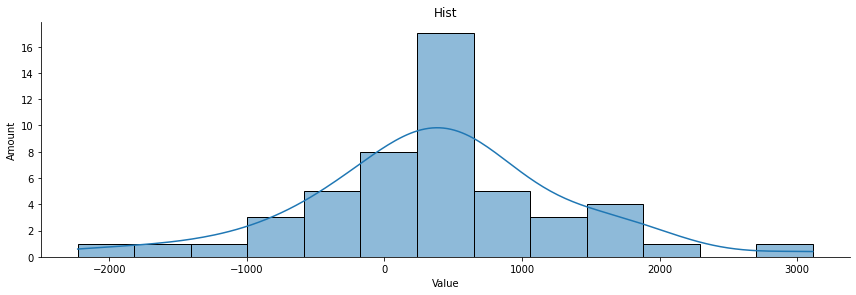

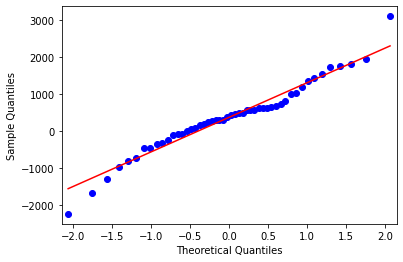

Looks to be Gaussian. Failed to reject H0


In [34]:
check_normal_distribution(pair6['couple_6_1'])

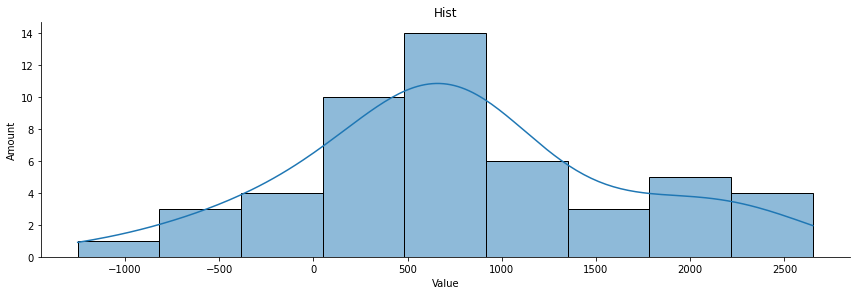

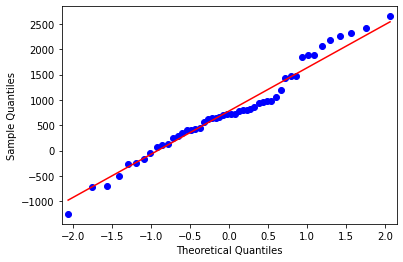

Looks to be Gaussian. Failed to reject H0


In [35]:
check_normal_distribution(pair6['couple_6_2'])

Матожидания:

382.9147216192629 781.363680455525


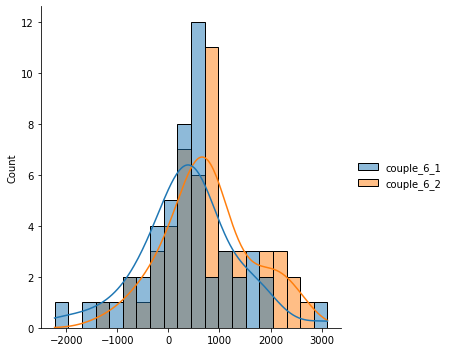

In [36]:
sns.displot((pair6.couple_6_1, pair6.couple_6_2), kde=True, bins = 20)

m1 = pair6.couple_6_1.mean()
m2 = pair6.couple_6_2.mean()

print("Матожидания:")
print()
print(m1, m2)

### Так как выборки имеют приблизительно нормальное распределение, то воспользуемся критерием Стьюдента

In [37]:
stat, p = statyst.ttest_ind(pair6.couple_6_1, pair6.couple_6_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.03000035262867582
Гипотеза отвергнута


In [38]:
stats, p = statyst.bartlett(pair6.couple_6_1, pair6.couple_6_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.52146444806034
Гипотеза принята


# Задание 2

In [39]:
print(df.var())

couple_1_1    659528.126145
couple_1_2    422997.981891
couple_2_1        21.321116
couple_2_2        13.324730
couple_3_1    255493.702046
couple_3_2    241460.764333
couple_4_1     36515.144331
couple_4_2    150477.438645
couple_5_1     80825.598508
couple_5_2    521844.399618
couple_6_1    893634.546472
couple_6_2    743275.118512
dtype: float64


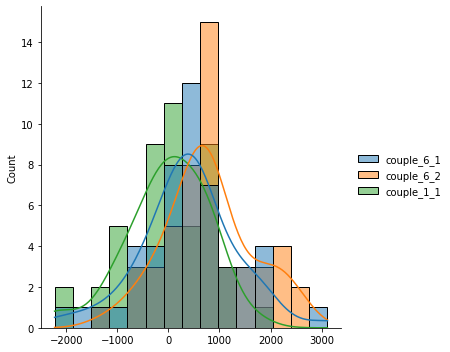

In [40]:
sns.displot((df.couple_6_1, df.couple_6_2, df.couple_1_1), kde=True)


In [41]:
stats, p = statyst.bartlett(df.couple_6_1, df.couple_6_2, df.couple_1_1)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.5635753703104158
Гипотеза принята


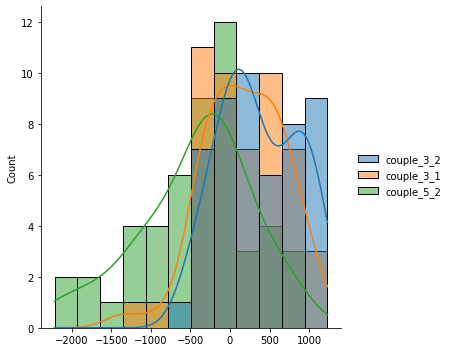

In [42]:
sns.displot((df.couple_3_2, df.couple_3_1, df.couple_5_2), kde=True)

In [43]:
stats, p = statyst.levene(df.couple_3_2, df.couple_3_1, df.couple_5_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 0.09805774968691848
Гипотеза принята


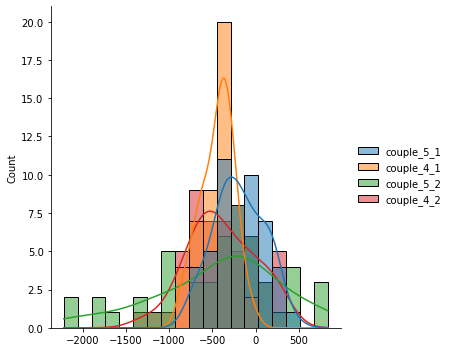

In [44]:
sns.displot((df.couple_5_1, df.couple_4_1, df.couple_5_2, df.couple_4_2), kde=True)

In [45]:
stats, p = statyst.bartlett(df.couple_5_1, df.couple_4_1, df.couple_5_2, df.couple_4_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 1.126104039330014e-19
Гипотеза отвергнута


In [46]:
stats, p = statyst.levene(df.couple_6_1, df.couple_6_2, df.couple_5_1, df.couple_5_2, df.couple_4_1, df.couple_4_2, df.couple_3_1, df.couple_3_2, df.couple_2_1, df.couple_2_2, df.couple_1_1, df.couple_1_2)
print("p = " + str(p))
alpha = 0.05
if p > alpha:
    print("Гипотеза принята")
else:
    print("Гипотеза отвергнута")

p = 7.831323066111795e-37
Гипотеза отвергнута


# Задание 3

In [51]:
p_array = []

for p in np.arange(0, 1, 0.01):
  arr = np.random.choice(2, 100, p=[p, 1-p])
  tmp_arr = []
  for x in arr:
    if x == 0:
      tmp_arr.append(np.random.normal())
    elif x == 1:
      tmp_arr.append(np.random.uniform())
  p_array.append(statyst.shapiro(tmp_p_array)

parryy = np.arr
ay(p_array)

dataframe = pd.DataFrame(p_array, columns=['p_arr'])
dataframe.dataframeity()
dataf
ame.plot.hist()


SyntaxError: invalid syntax (<ipython-input-51-779e8ed7d95b>, line 13)